best pos is [1.00000014 1.00000533] best fit is 3.024454458955216e-11


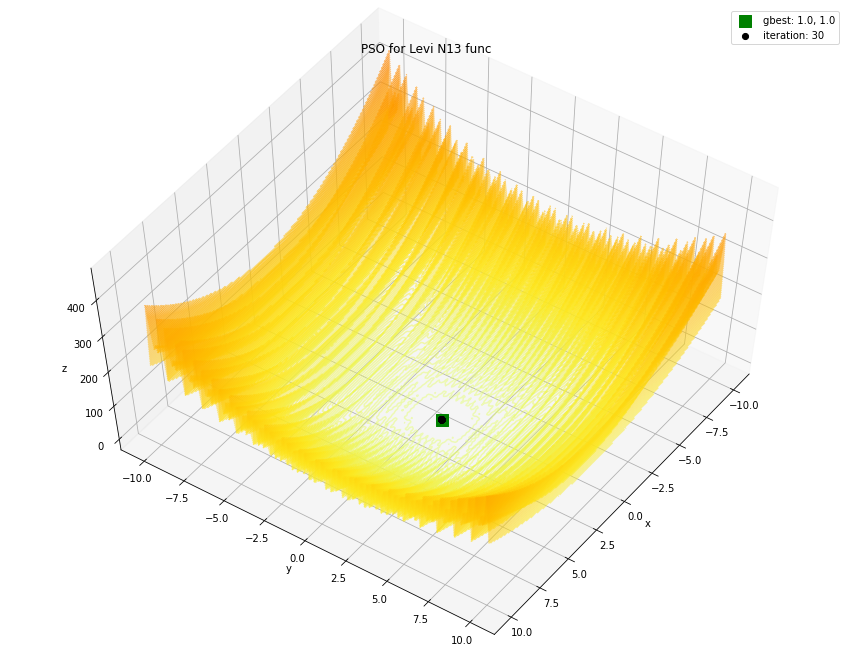

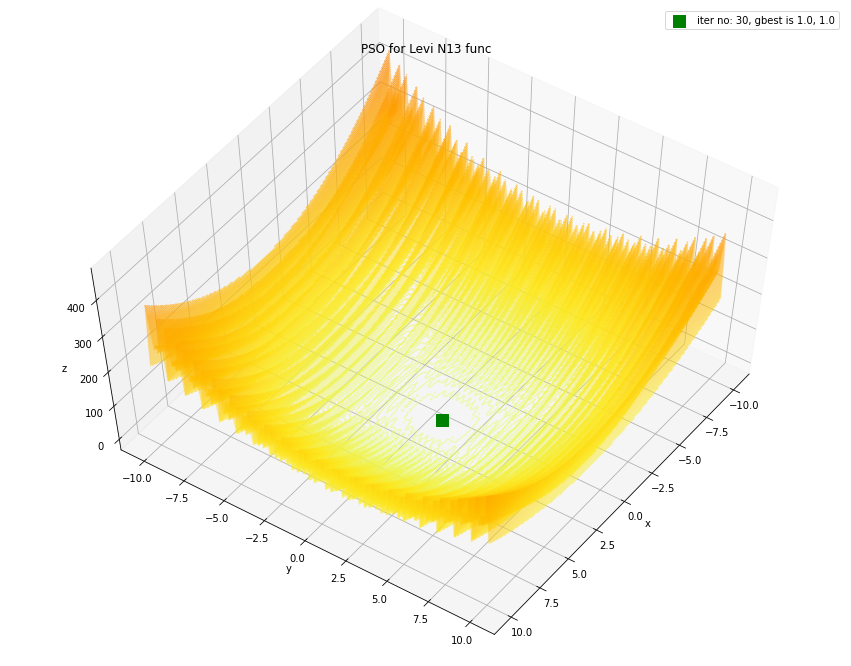

In [10]:
import numpy as np
import random
import imageio
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

n_iter = 30
n_par = 40
W = 0.5
c1 = 0.6
c2 = 0.7

par_pos = np.array([np.array([random.uniform(-10,10), random.uniform(-10,10)]) for i in range(n_par)])
par_velocity = np.array([np.array([0,0]) for i in range(n_par)])
par_best_pos = par_pos
par_fit_val = np.array([float('inf') for i in range(n_par)])
global_best_pos = np.array([float('inf'), float('inf')])
global_fit_val = float('inf')

plot_x = []
plot_y = []
plot_z = []
gbest = []

def levi_fitness(x,y):
  return (np.sin(3*np.pi*x))**2 + ((x - 1)**2)*(1 + (np.sin(3*np.pi*y))**2) + ((y-1)**2)*(1 + (np.sin(2*np.pi*y))**2)

for _ in range(n_iter):

  plot_x.append([])
  plot_y.append([])
  plot_z.append([])

  for i in range(n_par):

    fit_par = levi_fitness(par_pos[i][0], par_pos[i][1])
    plot_z[-1].append(fit_par)
    plot_x[-1].append(par_pos[i][0])
    plot_y[-1].append(par_pos[i][1])

    if(fit_par < par_fit_val[i]):
      par_best_pos[i] = par_pos[i]
      par_fit_val[i] = fit_par

    if(fit_par < global_fit_val):
      global_best_pos = par_pos[i]
      global_fit_val = fit_par
  gbest.append([global_best_pos[0], global_best_pos[1], global_fit_val])
      

  for i in range(n_par):
    par_pos[i] += W*par_velocity[i] + c1*random.random()*(par_best_pos[i] - par_pos[i]) + c2*random.random()*(global_best_pos - par_pos[i])

print("best pos is", global_best_pos, "best fit is", global_fit_val)

fig = plt.figure(figsize=(15,12))
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = levi_fitness(X, Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='Wistia', alpha=0.5)
ax.set_title('PSO for Levi N13 func');
ax.view_init(60, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

img = []
for i in range(n_iter):
  asd = ax.scatter3D(gbest[i][0], gbest[i][1], gbest[i][2],marker=",",c='g',s=150, alpha =1, label='gbest: '+str(round(gbest[i][0],2)) + ', ' + str(round(gbest[i][1],2)))
  abc = ax.scatter3D(plot_x[i], plot_y[i], plot_z[i], marker='.',c='k',s=150, alpha = 1, label='iteration: '+str(i+1))
  ax.legend()
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  img.append(image)
  if (i!=n_iter-1):
    abc.remove()
    asd.remove()
imageio.mimsave('PartilcesvsIterations.gif', img, fps=5)

fig = plt.figure(figsize=(15,12))
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = levi_fitness(X, Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='Wistia', alpha=0.5)
ax.set_title('PSO for Levi N13 func');
ax.view_init(60, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

img = []
for i in range(n_iter):
  asd = ax.scatter3D(gbest[i][0], gbest[i][1], gbest[i][2],marker=",",c='g',s=150, alpha =1, label='iter no: '+str(i+1)+', gbest is '+str(round(gbest[i][0],2))+', '+str(round(gbest[i][1],2)))
  ax.legend()
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  img.append(image)
  if i!=n_iter-1:
    asd.remove()
imageio.mimsave('GbestvsIteration.gif', img, fps=5)

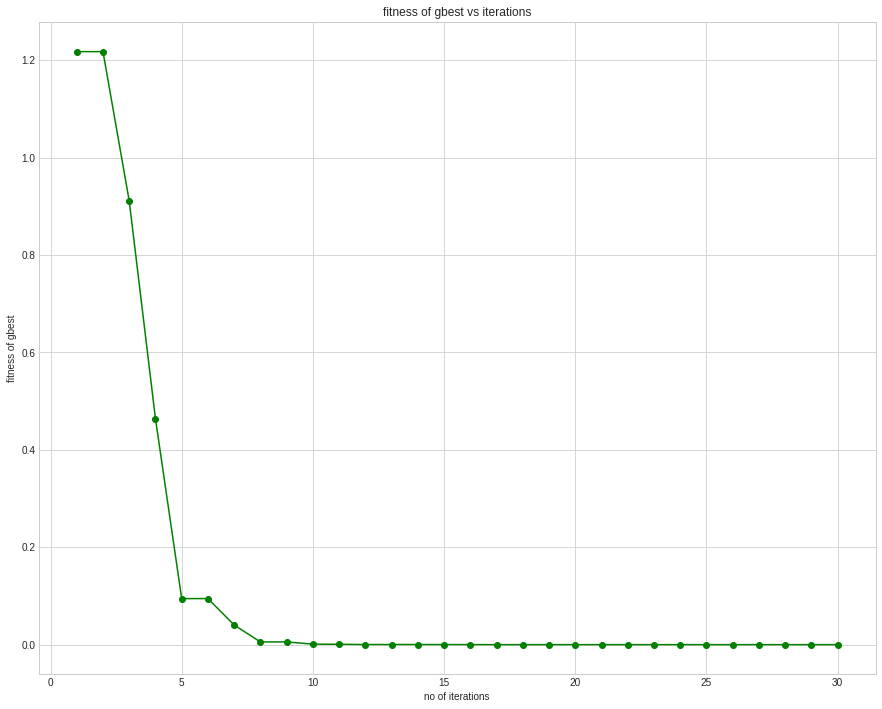

In [17]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,12))
ax = plt.axes()
x = []
a = []
ax.set_xlabel('no of iterations')
ax.set_ylabel('fitness of gbest')
ax.set_title('fitness of gbest vs iterations')
for i in range(len(gbest)):
  x.append(gbest[i][2])
  a.append(i+1)
plt.plot(a,x,marker='o',c='g')